# Data management

## Developing Data Visualization Interfaces: `DASH`

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/HEAD?labpath=%2Fpractice%2F3.3-dash-application.ipynb)

## You should look at your data
- explore & learn about the structure of the information colelcted
- good for communicating ideas & findings

### $\Rightarrow$ Principles for effective data visualization 

#### Choosing the righ type of chart
- summarize and present **easily** understandable information 
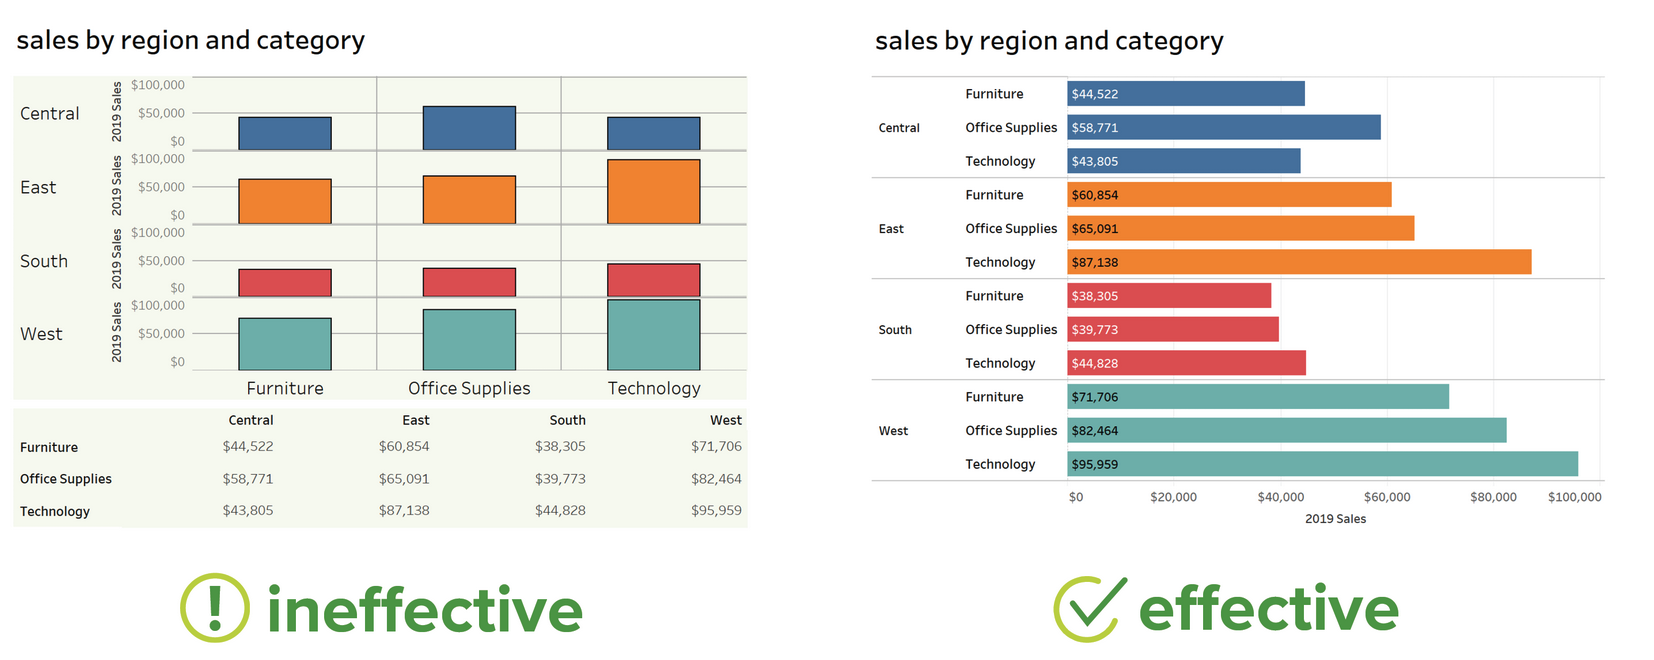

##### Graphs by "data relationships"
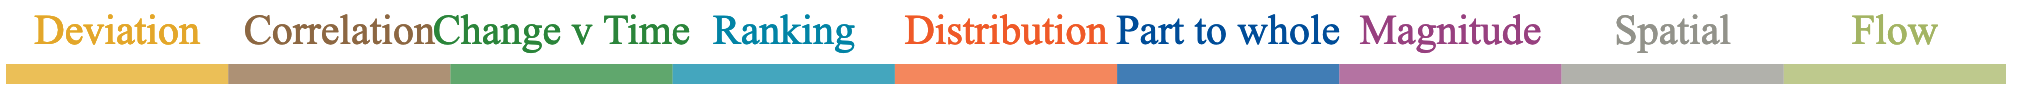

[Link](https://ft-interactive.github.io/visual-vocabulary/) to the Financial times resource!

#### Use text and labels to clarify, not clutter
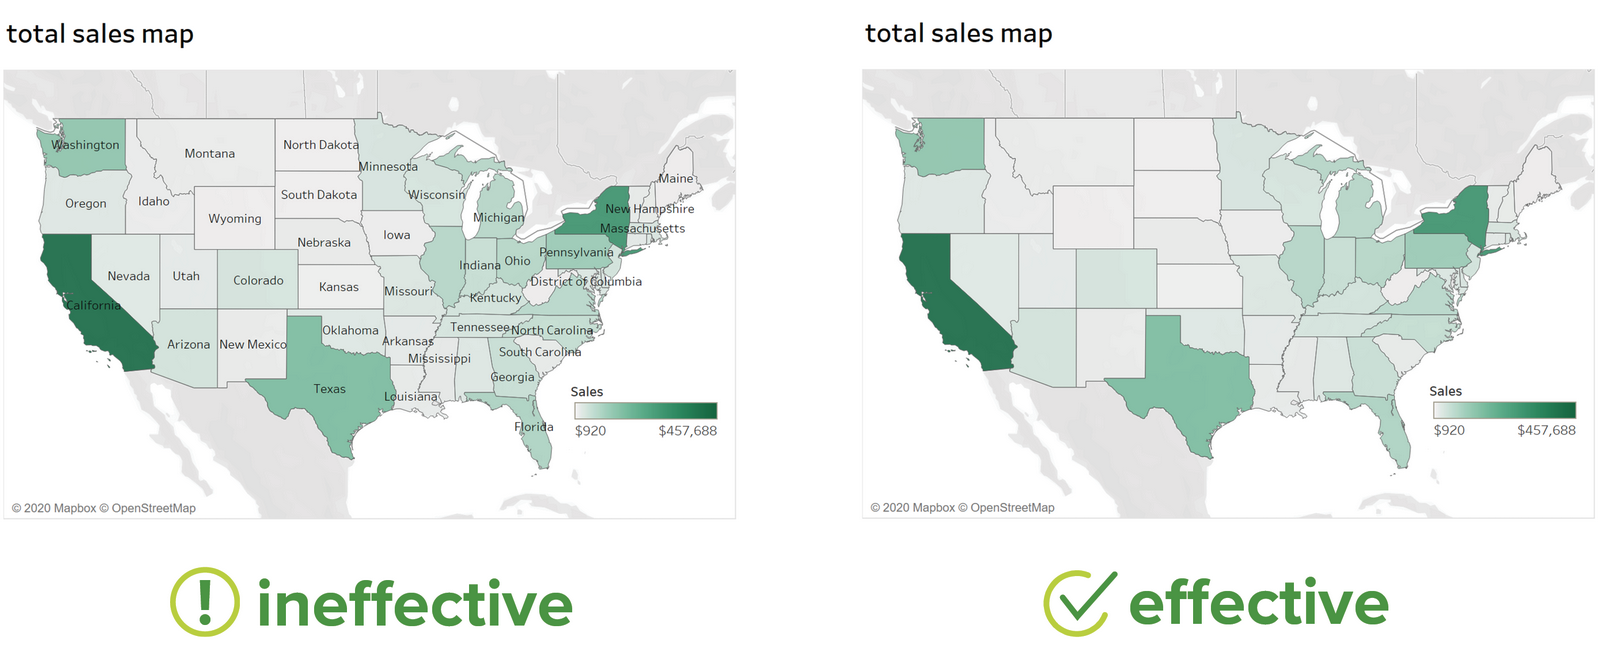

####  Use color to highlight important information or to differentiate or compare.
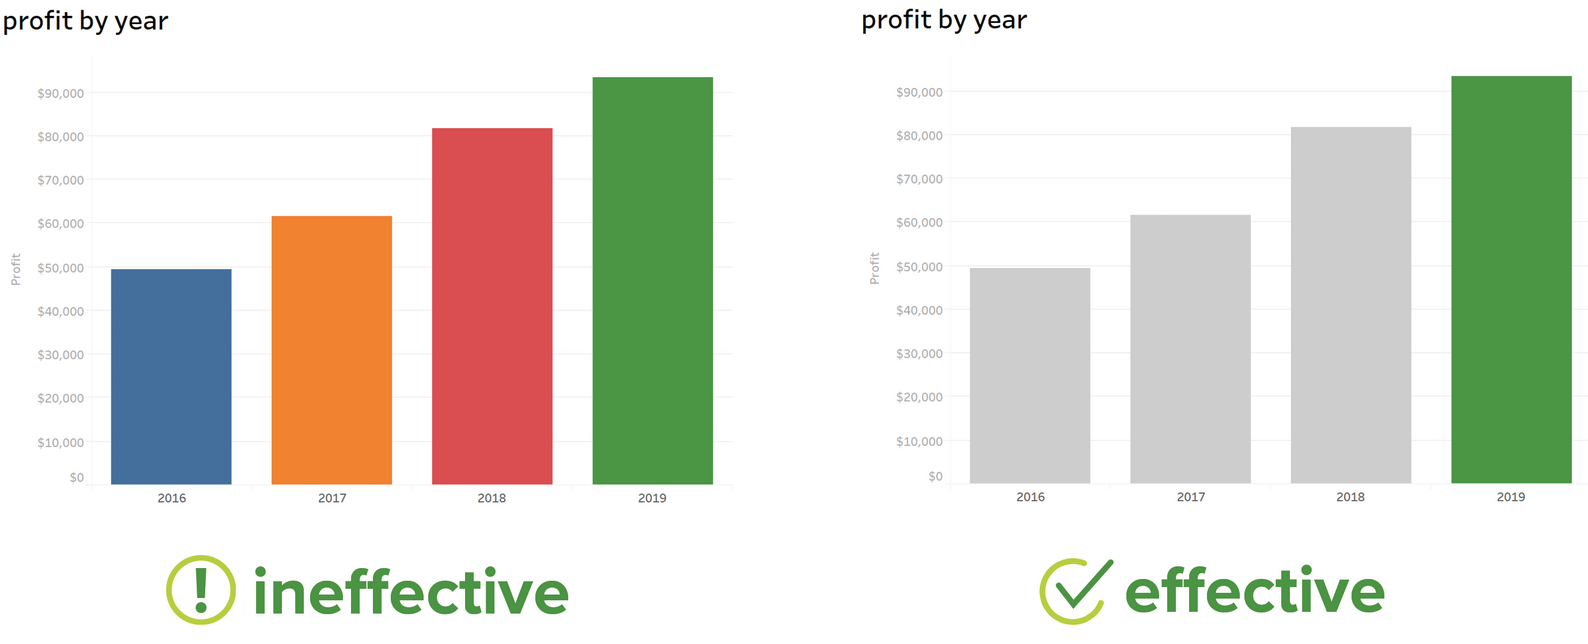

#### Avoid misleading visualizations
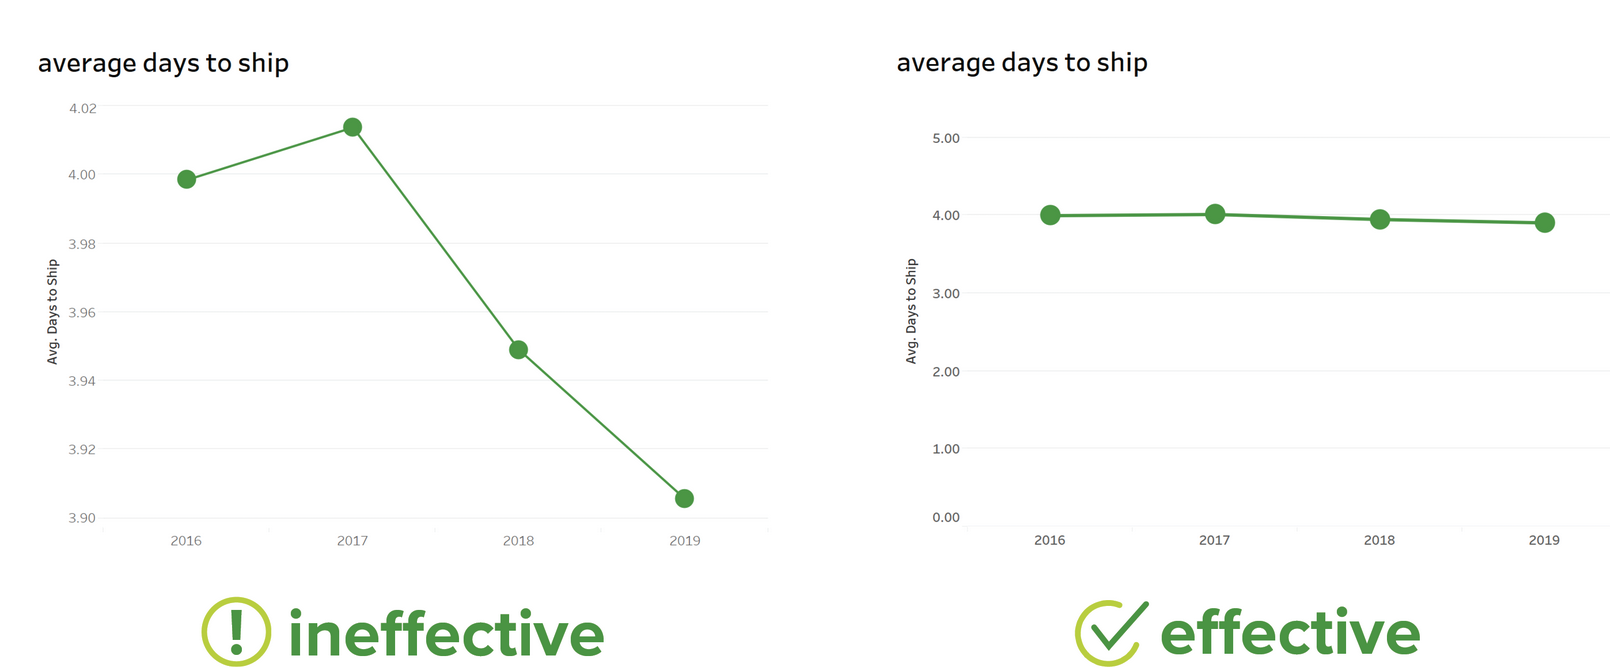

#### Less is more
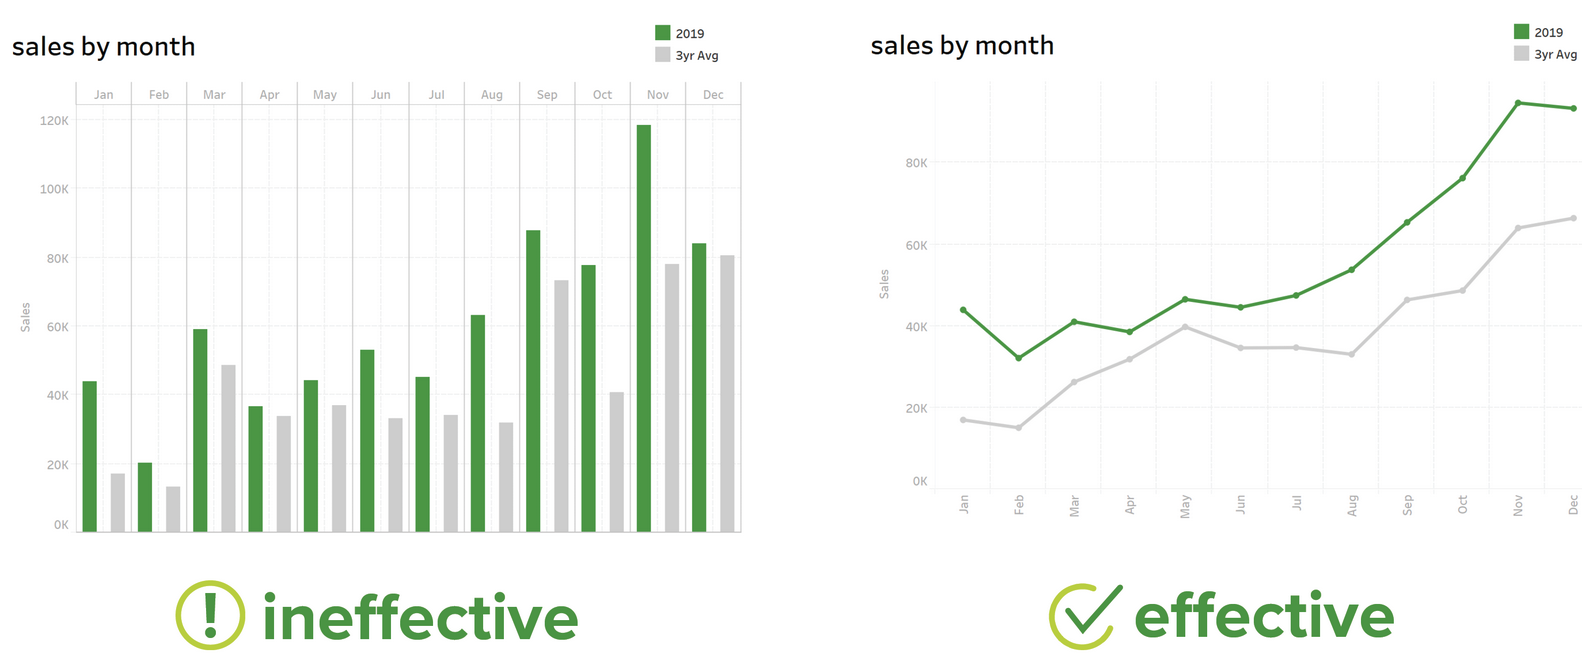

### Finding inspiration
- https://datavizcatalogue.com/ 
- https://flowingdata.com/chart-types/
- https://www.ft.com/chart-doctor

## Bring the interactivity in data visualization
- Allow the user to play with the data
- The human eye detects the dynamic changes very well!
- Now the norm in data journalism

## Why Data Visualization Interfaces? 

- For (scientific) dissemination
- Example: 
    - https://payroll-tax-inequality-app.herokuapp.com/
    - https://observablehq.com/


### What is a dashboard ?
- Data visualization platform
- Online
- Interactive

### Which tools do we need?

<span class="image">
  <table align="center">
    <tr>
      <th><a><img src="https://blog.savoirfairelinux.com/fr-ca/wp-content/uploads/2017/11/Python-Logo-PNG-Image-300x150.png" style="width: 180px; margin-bottom: 5px; " ></a><br><a href=""></a> </th>
      <th><a><img src="https://rapids.ai/assets/images/Plotly_Dash_logo.png" style="width: 180px; margin-bottom: 5px; " ></a><br><a href=""></a> </th>
      <th><a><img src="https://uploads-ssl.webflow.com/5de176c0d41c9b4a1dbbb0aa/5fe719c40db7fa2e3bea6855_heroku_logo.png" style="width: 180px; margin-bottom: 5px; " ></a><br><a href=""></a> </th>
    </tr>      

  </table>
</span>

### Why `Dash` ? user friendly + cool features
- Interactive and responsive graphs. 
- Hover over points to see their values, 
- click on legend items to toggle traces, 
- click and drag to zoom

#### References:
- dash : [tutorial](https://realpython.com/python-dash/?utm_campaign=Newsletter%20Veille%20Data&utm_medium=email&utm_source=Revue%20newsletter), [documentation](https://dash.plotly.com/)
- plotly: [express](https://plotly.com/python/plotly-express/)

### Prerequisite / ingredients
- python
- some prior knowledge of HTML/CSS ? 
- packages :
    - `Pandas`
    - `Dash`: interface library for creating analytical web applications 
    - `Plotly`: graphing library

### Set up
#### Install packages

In [1]:
# !pip install dash

### Basic inputs:

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1529701951/plot3_pdytlm.png" style="width: 880px; margin-bottom: 5px; " >


### Types of outputs

- tables
- 2-dimensional graphs: line, bar, pie charts
- 3-dimensional graphs: contour plots, heat maps
- geographical maps
- networks

High customization possibilities with Matplotlib, even more with Plotly, Highcharts

## Principles of the dash app

### Layout + Interactivity. 

1. The "layout" = `app.layout` 
    - Describes what the application looks like.
    - Includes `input` & `output`

2. The "interactivity" = `@app.callback()`
    - Simple reactive "decorator" for binding your custom data analysis code to your Dash user interface
    - Ie : the command that links user input to output on the application

### Interaction of Inputs & Outputs

<img src="https://miro.medium.com/max/1395/1*OwNszE5e3MLK5izCPXZCbQ.png" style="width: 880px; margin-bottom: 5px; " >


In [ ]:
import dash

# For interactive components like graphs, dropdowns, or date ranges.
import dash_core_components as dcc 

# For HTML tags
import dash_html_components as html

from dash.dependencies import Input, Output

import pandas as pd

# For graphics
import plotly.express as px 
import plotly.graph_objs as go

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

## Layout Overview using Dash Components

1. **HTML components**: Python wrappers for HTML elements. 
    - For example: paragraphs, headings, or lists.
    - `dash_html_components`
        - `Div`
        - `H1`, `H2`, `H3`, `H4` : titles
    
2. **Core components**: Python abstractions for creating interactive user interfaces
    - `dash_core_components` 
        - `Graph`
        - `Dropdown`
        - `Slider`

### Our First Dash Application: simple layout with HTML
Using `html.Div` & `html.H1` = html tags object from dash-html-components

In [ ]:
# Initializing the dash object
app = dash.Dash(external_stylesheets=external_stylesheets) # Always include

# Application layout: main meat of the application
app.layout = html.Div(children=[
    # [HTML tag]: H1, H2, H3, H4 for different titles
    html.H1(children='Hello Dash'), 
    
    # [HTML tag] Div : a division or a section in an HTML document.
    html.Div(children='''
        Dash: A web application framework for Python [Example].
    '''),
])

In [ ]:
app.run_server() # simple function to run the app on a local server

### Adding core components to the layout

#### Graph

Using `dcc.Graph` = Graph object from dash-core-components

#### Objective & data
We are going to build a graph that shows life expectancy in comparison to GDP per capita based in all countries around the World.

See for example https://plotly-life-expectancy.herokuapp.com 

In [ ]:
# load data 
df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/5d1ea79569ed194d432e56108a04d188/raw/a9f9e8076b837d541398e999dcbac2b2826a81f8/gdp-life-exp-2007.csv')
df.head()

In [ ]:
# the code of the graphics
fig = px.scatter(df, x="gdp per capita", y="life expectancy",
                 size="population", color="continent", hover_name="country",
                 log_x=True, size_max=60)

In [ ]:
# Initializing the dash object
app = dash.Dash(external_stylesheets=external_stylesheets) # Always include

# Application layout: 
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
    html.Div(children='''
        Dash: A web application framework for Python [Example].
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig # here I input the figure defined before
    )
])

app.run_server() # simple function to run the app on a local server

#### [Your turn] Create an `app` with :
- The Figure
- A more meaningfull title 
- A subtitle 

#### Filtering
[List](https://dash.plotly.com/dash-core-components) of dash cor components

In [ ]:
countries = df['country'].unique()

In [ ]:
# Initializing the dash object
app = dash.Dash(external_stylesheets=external_stylesheets) # Always include

# Application layout: 
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
    
    # --- NEW --- 
    html.Div([
        html.Label('Country'),
        dcc.Dropdown(
            id='country',
            options=[{'label': i, 'value': i} for i in countries],
            value='',
            placeholder='Select...',
            multi=True
        )
    ],
    style={'width': '20%', 'display': 'inline-block', 'margin-bottom': '20px'}),        
    # ---------- 
        
    dcc.Graph(
        id='example-graph',
        figure=fig, # here I input the figure defined before
    style={'width': '100%', 'display': 'inline-block', 'margin-bottom': '20px'}),    
])

app.run_server() # simple function to run the app on a local server

#### [Your turn] Add a component of your choice to the previous  `app` 

## Interactivity with `@app.callback`

`@app.callback`= a "decorator" => the **magic** of `dash`!

When an input element changes (e.g. when you select an item in the dropdown or drag the slider), Dash’s decorator provides your Python code with the new value of the input.

Calling the `update_graph` function each time either a country is selected or a life expectancy range is set. 

In [ ]:
# Initializing the dash object
app = dash.Dash(external_stylesheets=external_stylesheets) # Always include

# Application layout: 
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
    
    html.Div([
        html.Label('Country'),
        dcc.Dropdown(
            id='country',
            options=[{'label': i, 'value': i} for i in countries],
            value='',
            placeholder='Select...',
            multi=True
        )
    ],
    style={'width': '20%', 'display': 'inline-block', 'margin-bottom': '20px'}),
    
    html.Div([
        html.Label('Life Expectancy'),
        dcc.Slider(
            id='expectancy-slider',
            min=30,
            max=80,
            value=30,
            step=None,
            marks={'30':'>30', '40':'>40', '50':'>50', '60':'>60', '70':'>70', '80':'>80'}
        ),
    ],
    style={'width': '20%', 'display': 'inline-block', 'margin-bottom': '20px', 'margin-left': '20px'}), 
        
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure=fig, # here I input the figure defined before
    style={'width': '100%', 'display': 'inline-block', 'margin-bottom': '20px'}),    
])


# --- NEW --- 
# callback decorator + a function that manipulates the data and returns a dictionary

@app.callback(
    # the dependencies refer to elements from the layout using id
    dash.dependencies.Output('life-exp-vs-gdp', 'figure'),
    [
        # input 1:
        dash.dependencies.Input('expectancy-slider', 'value'),
        # input 2:
        dash.dependencies.Input('country', 'value')
    ])

# def update_graph(input 1,input 2)

def update_graph(expectancy, country):

    filtered_df = df.loc[df["life expectancy"] > expectancy]

    if (country != '' and country is not None):
        filtered_df = filtered_df[df.country.str.contains('|'.join(country))]

    traces = []
    for i in filtered_df.continent.unique():
        df_by_continent = filtered_df[filtered_df['continent'] == i]
        traces.append(go.Scatter(
            x=df_by_continent['gdp per capita'],
            y=df_by_continent['life expectancy'],
            text=df_by_continent['country'],
            mode='markers',
            opacity=0.7,
            marker={
                'size': 15,
                'line': {'width': 0.5, 'color': 'white'}
            },
            name=i
        ))
    # Should return a dictionary
    return {
        'data': traces,
        'layout': go.Layout(
            xaxis={'title': 'GDP Per Capita', 'titlefont': dict(size=18, color='darkgrey'), 'zeroline': False, 'ticks': 'outside' },
            yaxis={'title': 'Life Expectancy', 'titlefont': dict(size=18, color='darkgrey'), 'range': [30, 90], 'ticks': 'outside'},
            margin={'l': 60, 'b': 60, 't': 30, 'r': 20},
            legend={'x': 1, 'y': 1},
            hovermode='closest'
        )
    }

app.run_server() # simple function to run the app on a local server

## Graph options for interactive Visualizations 
Listed [here](https://dash.plotly.com/interactive-graphing)

## Going Further: Deployment on a (remote) Server

- so far, we had been running our app on a local server
- How can we make it accessible to others? 
    - *Deploy* it on a remote server 
    - for example: `Heroku`

### Deployment steps:

1. **Install** `git` & `heroku` => check installation in the terminal by running:
```
git --version 
heroku --version
```

You need to keep all the files into an app directory (that will be send to `heroku`)

2. Create a python script called `app.py`, with the following lines (new relative to local server):

```
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server # NEW
```

3. In the project’s root directory:

 - Create a file called `runtime.txt` where you’ll specify a Python version for your Heroku app: 
```
python-3.8.6
```

 - Create a file called `requirements.txt` : list libraries required to set up your Dash application on a web server 
    
```
dash==1.13.3
pandas==1.0.5
gunicorn==20.0.4
```

We need `gunicorn` (NEW)

 - create a file named `Procfile` with the following content:

```
web: gunicorn app:server
```

This file tells the Heroku app what commands should be executed to start your app. In this case, it starts a gunicorn server for your dashboard.

#### Your project’s structure should look like this
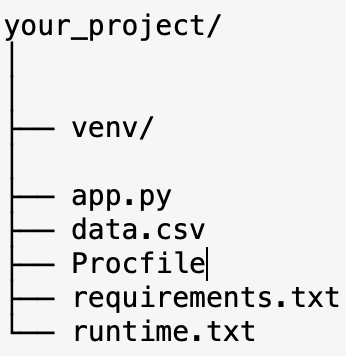

5. In a terminal at the root directory of the project, 
    - initialize the git repository with
    ```
    git init
    ```
    - Add & commit files project files:
    ```
    git add .
    git commit -m 'Add dashboard files'
    ```

6. Last step: the **Heroku application**:
    - create an app in Heroku (on the online platform) or by running:
    
    ```heroku create APP-NAME # Choose a name for your app
    ```
    
    - push your code there using git
    
    ```
    push heroku master
    ```
    
    - start the app in one of Heroku's free server option
    
    ```
    heroku ps:scale web=1
    ```
    
    - look at your app :
    https://APP-NAME.herokuapp.com/

## Google colab notebook on maps: [link](https://colab.research.google.com/drive/13LjIDMqwwxKXSPT7W-_so7HBXGUzffX8?usp=sharing)